In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('police.csv')
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


#### Data Exprolation

In [41]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Length: 91741, dtype: bool

In [42]:
data.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [44]:
# Remove Extra columns
df = data.drop(['search_type', 'county_name', 'driver_age_raw', 'driver_race', 'search_conducted', 'violation_raw' ], axis=1)
df

,stop_date,stop_time,driver_gender,driver_age,violation,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,20.0,Speeding,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,40.0,Speeding,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,33.0,Speeding,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,19.0,Other,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,21.0,Speeding,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,29.0,Speeding,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,33.0,Equipment,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,23.0,Moving violation,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,22.0,Speeding,Citation,False,0-15 Min,False


In [45]:
df.isna().sum()

stop_date                0
stop_time                0
driver_gender         5335
driver_age            5621
violation             5333
stop_outcome          5333
is_arrested           5333
stop_duration         5333
drugs_related_stop       0
dtype: int64

In [46]:
# fill in the driver_age with 1
df['driver_age'] = df['driver_age'].fillna(1)

In [47]:
cols_to_fill = ['violation','stop_duration', 'is_arrested']
for col in cols_to_fill:
    df[col] = df[col].fillna('Unknown')

In [48]:
# fill by driver_gender with Male
df['driver_gender'].fillna('M').head()

0    M
1    M
2    M
3    M
4    F
Name: driver_gender, dtype: object

In [49]:
df['stop_outcome'].fillna('Citation').head()

0         Citation
1         Citation
2         Citation
3    Arrest Driver
4         Citation
Name: stop_outcome, dtype: object

In [50]:
# change stope_date name replace by date
df.rename(columns={'stop_date' : 'date'}, inplace=True)

In [51]:
df.head(2)

,date,stop_time,driver_gender,driver_age,violation,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,20.0,Speeding,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,40.0,Speeding,Citation,False,0-15 Min,False


In [52]:
# Convert driver_age to interger 
df['driver_age'] = df['driver_age'].astype(int)

In [53]:
df.head(2)

,date,stop_time,driver_gender,driver_age,violation,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,20,Speeding,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,40,Speeding,Citation,False,0-15 Min,False


In [67]:
gender_count = df['driver_gender'].value_counts()
gender_count

driver_gender
M    62895
F    23511
Name: count, dtype: int64

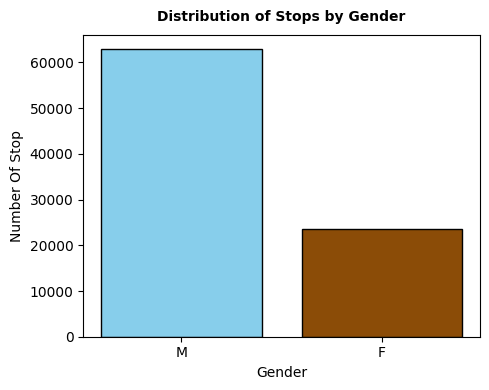

In [68]:
# Now we have a creat bar graph with Gender
x_labels = gender_count.index
y_counts = gender_count.values
plt.figure(figsize=(5,4))
custom_color = ['skyblue', '#8B4C07']

plt.bar(x_labels, y_counts,color=custom_color, edgecolor='black')
plt.title('Distribution of Stops by Gender',fontsize=10,fontweight='bold',pad=10)
plt.xlabel('Gender')
plt.ylabel('Number Of Stop')
plt.tight_layout()

plt.show()

In [56]:
outcome_stop = df['stop_outcome'].value_counts()
outcome_stop

stop_outcome
Citation            77006
Warning              5294
Arrest Driver        2571
N/D                   590
No Action             589
Arrest Passenger      358
Name: count, dtype: int64

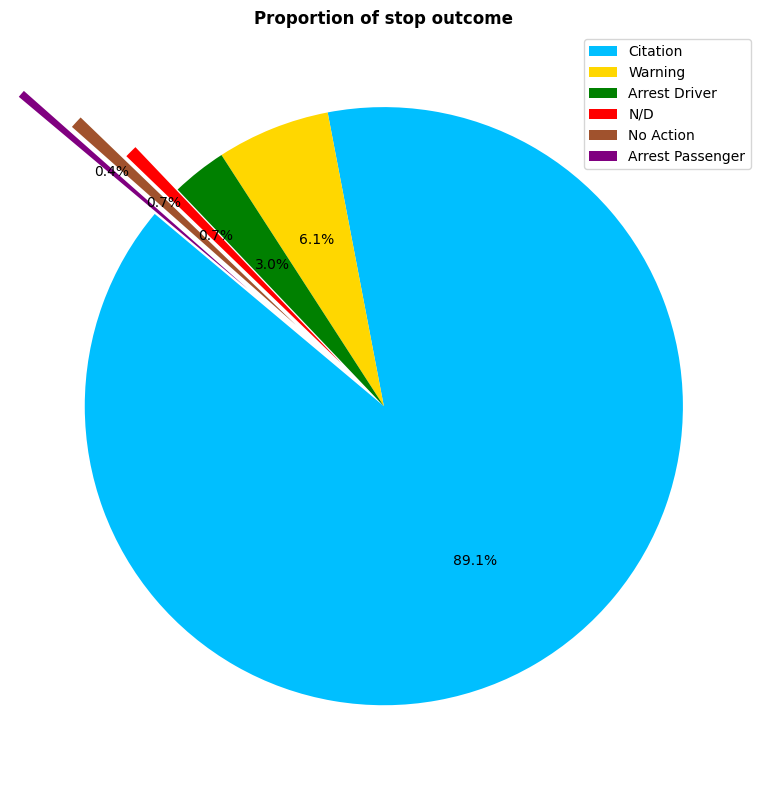

In [57]:
# creat a pie graph an proportion of stop outcome

outcome_stop = df['stop_outcome'].value_counts()
pie_color = ['deepskyblue','gold', 'green', 'red', 'sienna', 'purple']
plt.figure(figsize=(8,8))
plt.pie(outcome_stop, startangle=140, autopct='%1.1f%%',explode=[0,0,0,0.2,0.4,0.6],colors=pie_color)
plt.title('Proportion of stop outcome',fontweight='bold')
plt.legend(labels=outcome_stop.index)
plt.tight_layout()

plt.show()

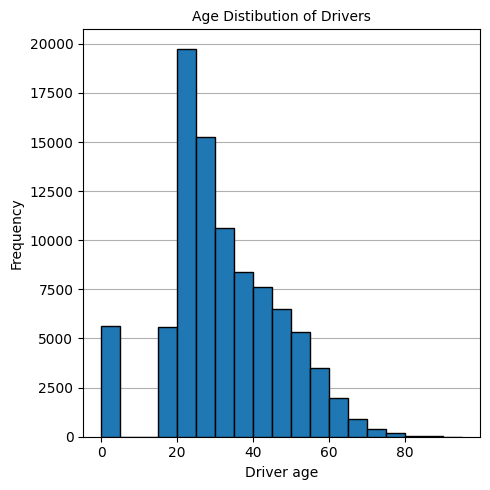

In [66]:
# Creat a histogram graph Age distibution of driver

plt.figure(figsize=(5,5))
plt.hist(df['driver_age'],edgecolor='black', bins=range(0,100,5),zorder=3)
plt.title('Age Distibution of Drivers',fontsize=10)
plt.xlabel('Driver age')
plt.ylabel('Frequency')
plt.grid(axis='y', zorder=0)
plt.tight_layout()
plt.show()